In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [3]:
# hyperparameters
batch_size = 32
learning_rate = 0.01
num_epochs = 5

In [4]:
train = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=4)
test = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=4)

In [5]:
train.dataset.data.shape, test.dataset.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

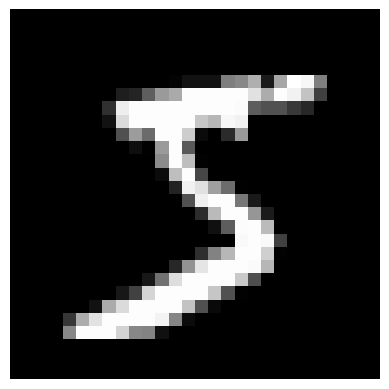

In [11]:
plt.imshow(train_dataset.data[0], cmap='gray')
plt.axis("off")
plt.show()